# Sports Activity Detection

#### 1. Download Dataset and Understand the Format

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [28]:
# # from google.colab import drive

# # drive.mount('/content/drive')

# # data_path = '/content/drive/My Drive/data'

data_path = 'C:/Users/dell/Downloads/daily+and+sports+activities/data'

def preprocess_and_reduce_dimension(data_path):
    X_train_means, X_val_means = [], []
    X_train_flattened, X_val_flattened = [], []
    y_val = []

    for activity_folder in os.listdir(data_path):
        activity_folder_path = os.path.join(data_path, activity_folder)
        activity_label = int(activity_folder[1:])  # Extract the numeric part from the folder name
        for subject_folder in os.listdir(activity_folder_path):
            subject_folder_path = os.path.join(activity_folder_path, subject_folder)
            segment_files = os.listdir(subject_folder_path)
            for i, segment_file in enumerate(segment_files):
                segment_file_path = os.path.join(subject_folder_path, segment_file)
                segment_data = np.loadtxt(segment_file_path, delimiter=',')

                if i < 48:
                    # Considering only training data
                    segment_mean = np.mean(segment_data, axis=0)
                    X_train_means.append(segment_mean)
                    segment_flattened = segment_data.flatten()
                    X_train_flattened.append(segment_flattened)
                else:
                    # Consider only validation data
                    segment_mean = np.mean(segment_data, axis=0)
                    X_val_means.append(segment_mean)
                    segment_flattened = segment_data.flatten()
                    X_val_flattened.append(segment_flattened)
                    y_val.append(activity_label)

    X_train_means = np.array(X_train_means)
    X_val_means = np.array(X_val_means)
    X_train_flattened = np.array(X_train_flattened)
    X_val_flattened = np.array(X_val_flattened)
    y_val = np.array(y_val)



    return X_train_means, X_val_means, X_train_flattened, X_val_flattened, y_val

X_train_means, X_val_means, X_train_flattened, X_val_flattened, y_val = preprocess_and_reduce_dimension(data_path)

print("Mean-based Preprocessed Training Data Shape:", X_train_means.shape)
print("Mean-based Preprocessed Validation Data Shape:", X_val_means.shape)
print("Flattened Preprocessed Training Data Shape:", X_train_flattened.shape)
print("Flattened Preprocessed Validation Data Shape:", X_val_flattened.shape)
print("Validation Labels Shape:", y_val.shape)

# np.set_printoptions(threshold=np.inf)
# print(y_val)




Mean-based Preprocessed Training Data Shape: (7296, 45)
Mean-based Preprocessed Validation Data Shape: (1824, 45)
Flattened Preprocessed Training Data Shape: (7296, 5625)
Flattened Preprocessed Validation Data Shape: (1824, 5625)
Validation Labels Shape: (1824,)


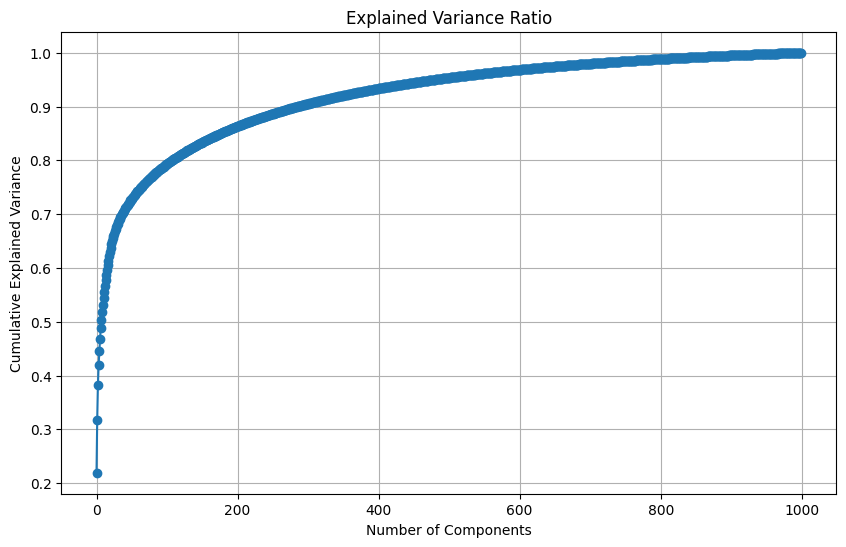

Optimal number of components for 95% variance: 481
(7296, 481)


In [3]:
cov_matrix = np.cov(X_train_flattened, rowvar=False)
pca = PCA()
pca.fit(X_train_flattened)

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_num_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Optimal number of components for 95% variance:",optimal_num_components)

pca_optimal = PCA(n_components=optimal_num_components)
X_train_flattened= pca_optimal.fit_transform(X_train_flattened)
print(X_train_flattened.shape)


#### 2. Clustering Using K-Means


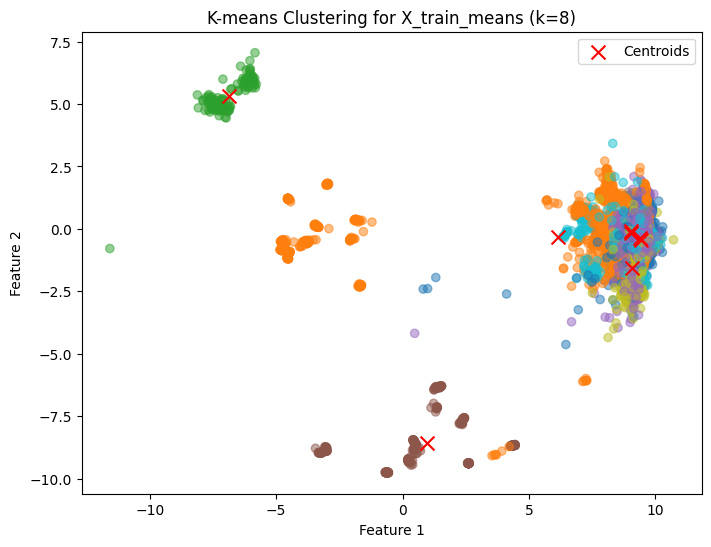

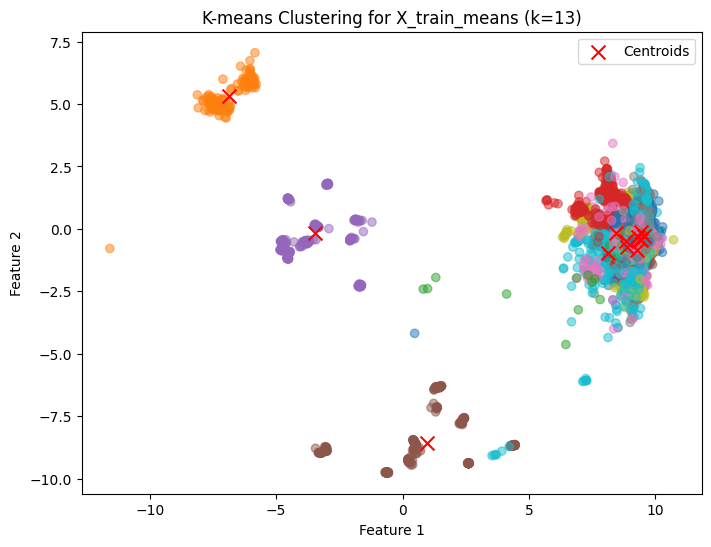

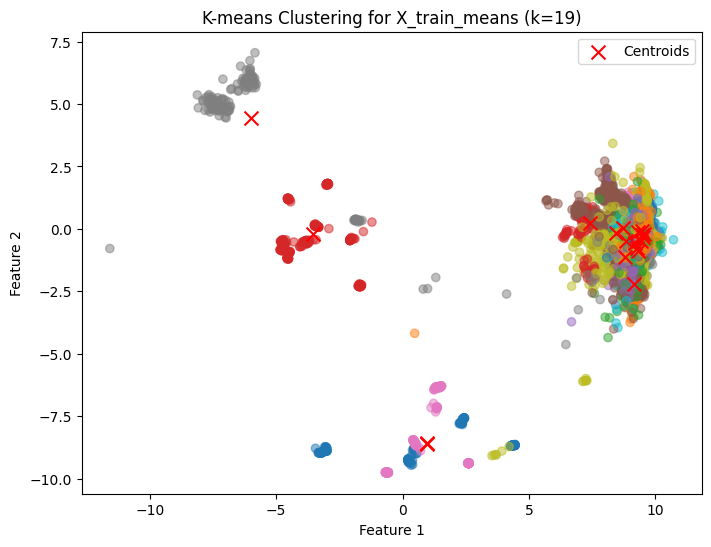

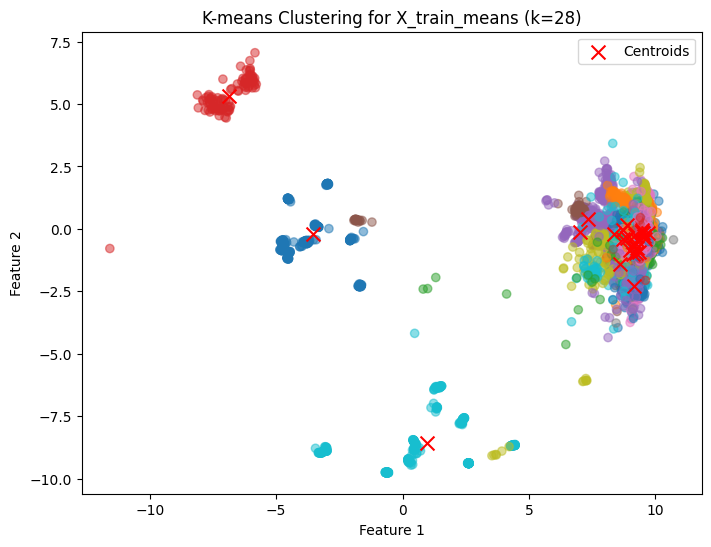

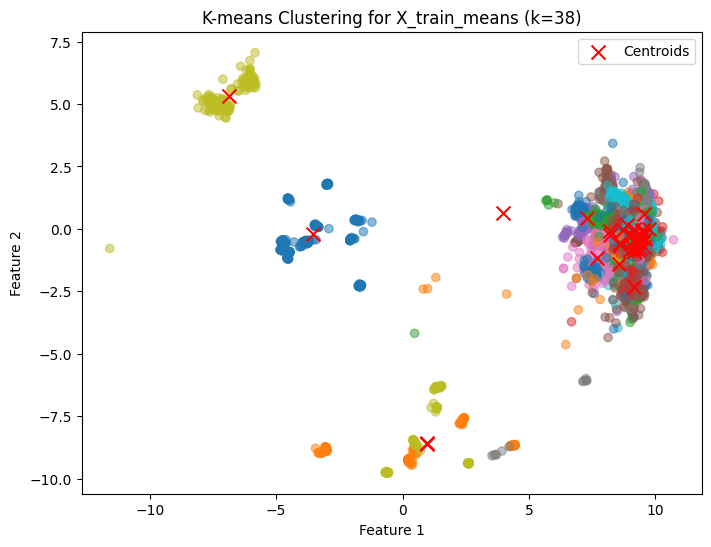

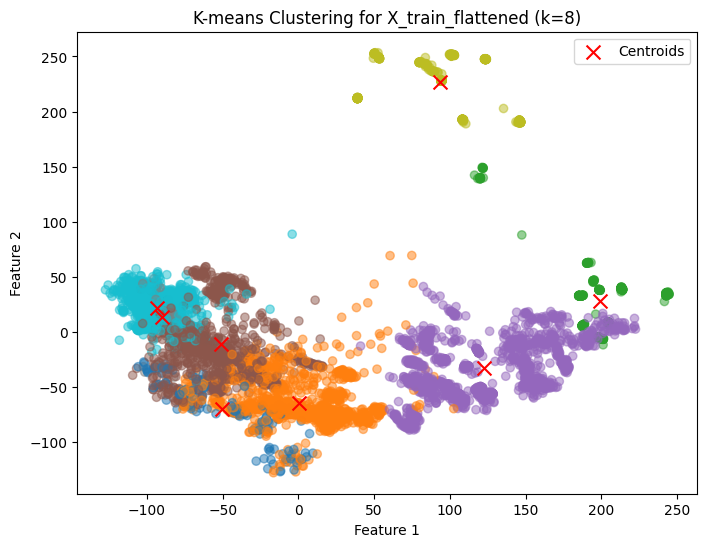

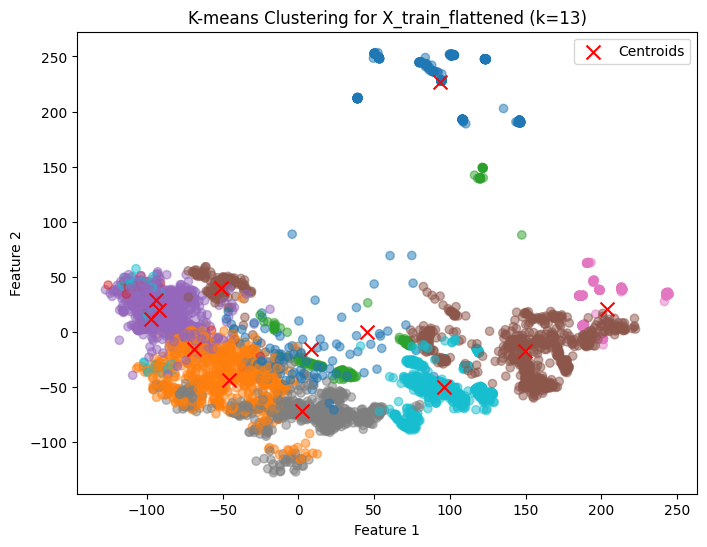

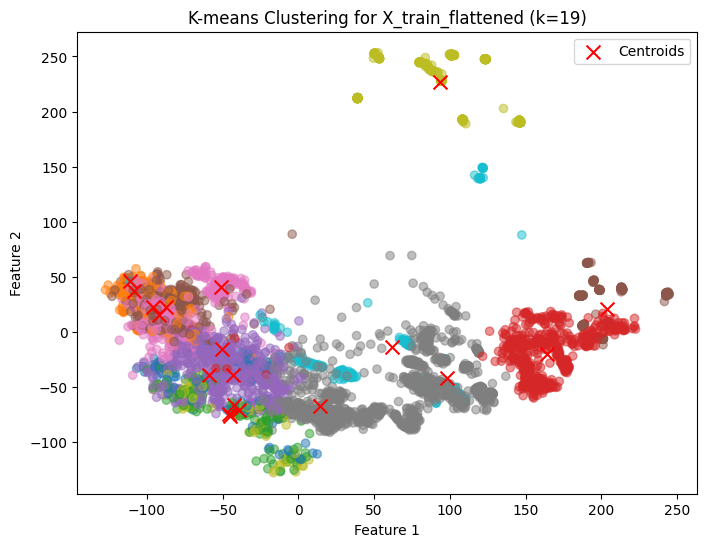

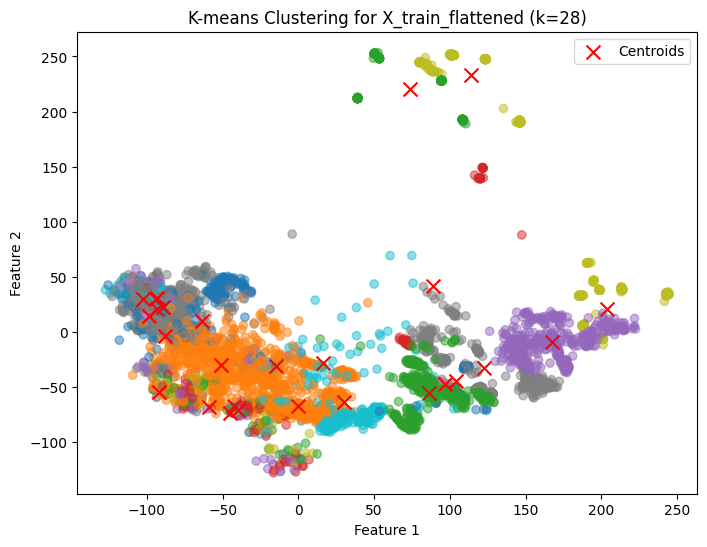

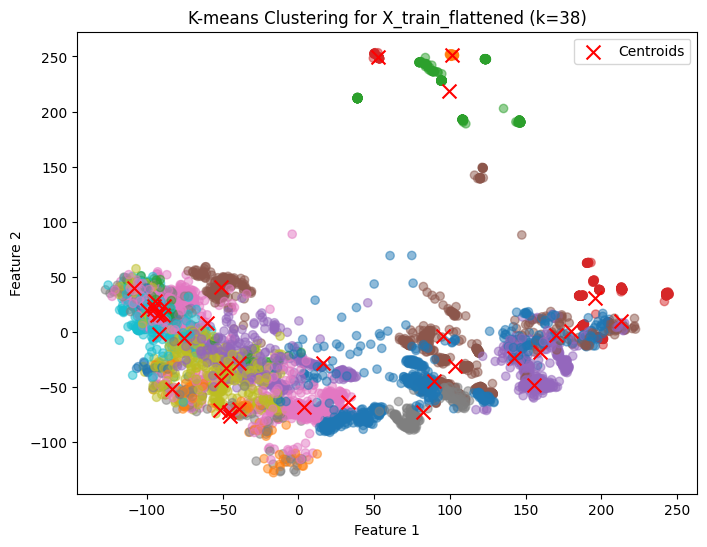

In [27]:
def kmeans(X,n_clusters,max_iter=300):
    centroids = X[np.random.choice(X.shape[0],n_clusters,replace=False)]
    for _ in range(max_iter):
        distances =np.sqrt(((X - centroids[:,np.newaxis])**2).sum(axis=2))
        labels=np.argmin(distances, axis=0)
        new_centroids=np.zeros_like(centroids)
        for i in range(n_clusters):
            new_centroids[i]=np.mean(X[labels == i], axis=0)
        if np.allclose(centroids, new_centroids):
            break  
        centroids = new_centroids
    return labels, centroids

k_values = [8, 13, 19, 28, 38]
datasets = [(X_train_means, 'X_train_means'), (X_train_flattened, 'X_train_flattened')]

#visualizing 2 attributes for visualization
for X, dataset_name in datasets:
    for k in k_values:
        labels,centroids=kmeans(X,k)
        plt.figure(figsize=(8,6))
        plt.scatter(X[:,0], X[:,1],c=labels,cmap='tab10',alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:,1], c='red',marker='x',s=100, label='Centroids')
        plt.title(f'K-means Clustering for {dataset_name} (k={k})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()


#### 1. Download Dataset and Understand the Format

In [7]:
import numpy as np
import pandas as pd
import sklearn as sk

In [38]:
# Dataset: https://archive.ics.uci.edu/dataset/256/daily+and+sports+activities
activities_folders = ['a'+str('{:02d}'.format(i)) for i in range(1, 20)]
subjects_folders = ['p'+str(i) for i in range(1, 9)]
segments = ['s'+str('{:02d}'.format(i)) for i in range(1, 61)]

data_points = []
X_train = []
X_test = []
y_train = []
y_test = []

for activity in activities_folders:
    for subject in subjects_folders:
        local_train = []
        local_test = []
        for segment in segments:
            local_data = pd.read_csv(f'data/{activity}/{subject}/{segment}.txt', header=None).values.flatten()
            if len(local_train) < 6:
                local_train.append(local_data)
                y_train += [activity]
            else:
                local_test.append(local_data)
                y_test += [activity]
        X_train += local_train
        X_test += local_test

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [41]:
print('Training Dataset Statistics')
print(X_train.shape)
print(X_train)
print('')
print('Test Dataset Statistics')
print(X_test.shape)
print(X_test)
print('')


Training Dataset Statistics
(912, 5625)
[[ 8.1305    1.0349    5.4217   ...  0.73897   0.30275  -0.056262]
 [ 7.9665    1.1684    5.6755   ...  0.74027   0.30192  -0.057155]
 [ 7.8917    1.139     5.698    ...  0.74072   0.30101  -0.057301]
 ...
 [11.826    -3.3176   -1.535    ...  0.65512   0.37451   0.37297 ]
 [ 9.1401   -3.1102    0.1175   ...  0.63131   0.4995    0.22186 ]
 [ 9.5506    2.1373    0.39436  ...  0.61227   0.50967   0.32649 ]]

Test Dataset Statistics
(8208, 5625)
[[ 7.9589    1.1825    5.634    ...  0.74242   0.30413  -0.055288]
 [ 7.8991    1.1681    5.6633   ...  0.7414    0.30156  -0.055427]
 [ 8.0483    1.1523    5.5309   ...  0.74136   0.30124  -0.056375]
 ...
 [10.107     0.43644   0.02232  ...  0.75904   0.52748   0.072323]
 [14.075    -2.0044    0.29813  ...  0.7354    0.27723   0.44881 ]
 [ 8.3123    0.96283   3.4825   ...  0.47028   0.43618   0.54511 ]]



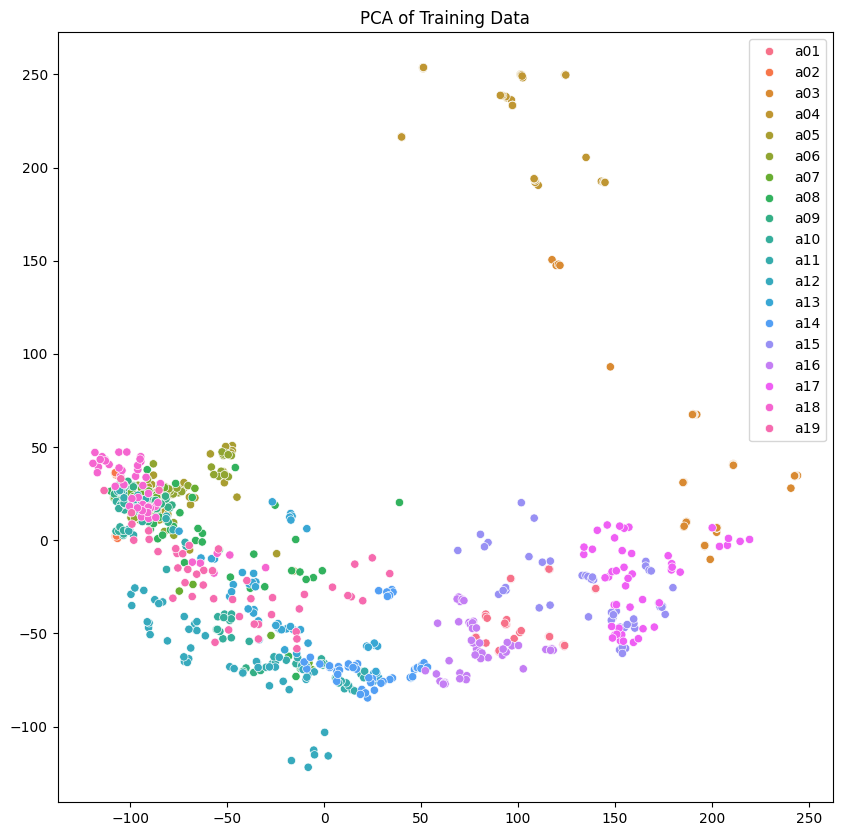

In [51]:
# Plot X_train
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train)
plt.title('PCA of Training Data')
plt.show()

#### 3. Clustering Using Normalized Cut

#### 4. Evaluation

In [ ]:
# Precision

In [ ]:
# Recall

In [ ]:
# F1 Score

In [ ]:
# Conditional Entropy

#### 5. New Clustering Algorithm